<a href="https://colab.research.google.com/github/caseycharles/bowel-cancer-survival-analysis/blob/main/bowel_cancer_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

  Cancer Site Gender       IMD quintile             Standardisation type  \
0        Anus   Male  1 - most deprived  Age-standardised (5 age groups)   
1        Anus   Male  1 - most deprived  Age-standardised (5 age groups)   
2        Anus   Male  1 - most deprived  Age-standardised (5 age groups)   
3        Anus   Male  1 - most deprived  Age-standardised (5 age groups)   
4        Anus   Male  1 - most deprived  Age-standardised (5 age groups)   

   Years since diagnosis  Patients  Net survival (%)  
0                      1       459              77.1  
1                      2       459              63.2  
2                      3       459              55.6  
3                      4       459               NaN  
4                      5       459               NaN  
    cancer_site gender        deprivation             Standardisation type  \
180       Bowel   Male  1 - most deprived  Age-standardised (5 age groups)   
181       Bowel   Male  1 - most deprived  Age-standardis

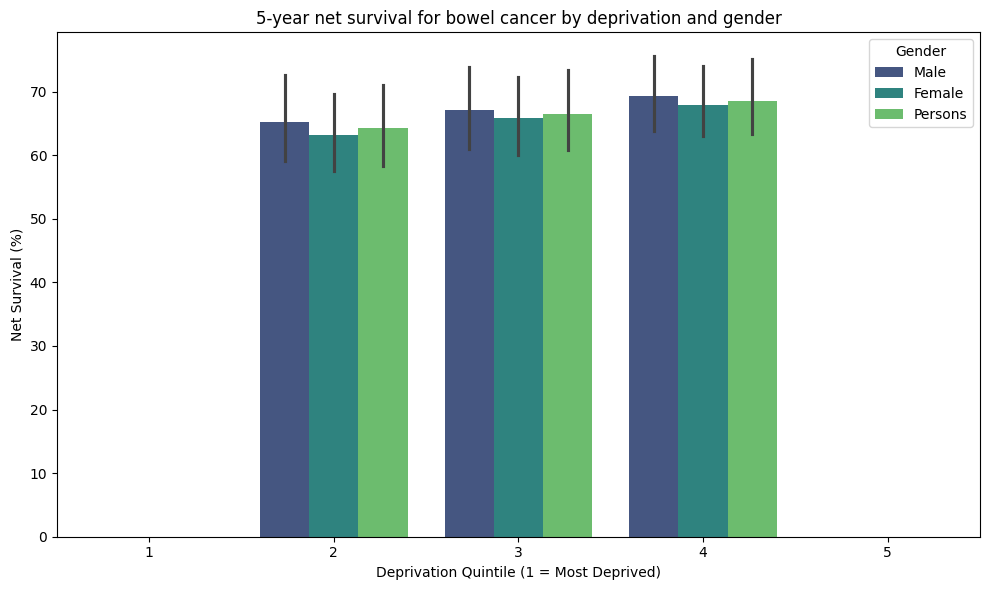

In [17]:
# load the dataset
df = pd.read_excel('bowel cancer data.xlsx')
# preview the data
print (df.head())
# clean column names
df.columns = df.columns.str.strip()
df.rename(columns={'Cancer Site': 'cancer_site','IMD quintile': 'deprivation', 'Net survival (%)': 'survival', 'Gender': 'gender'}, inplace=True)
# filter to only specific cancer
df = df[df['cancer_site'] == 'Bowel']
# preview only filtered data
print (df.head())
# print columns after renaming to verify
print(df['cancer_site'].unique())
# convert deprivation to ordered category (1= most deprived)
deprivation_order = ['1', '2', '3', '4', '5']
df['deprivation'] = df['deprivation'].astype(str)
df['deprivation'] = pd.Categorical(df['deprivation'], categories=deprivation_order, ordered=True)
# plot bar chart
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='deprivation', y='survival', hue='gender', palette='viridis')
# add labels and title
plt.title ('5-year net survival for bowel cancer by deprivation and gender')
plt.xlabel('Deprivation Quintile (1 = Most Deprived)')
plt.ylabel('Net Survival (%)')
plt.legend(title='Gender')
plt.tight_layout()
# save bar chart as image
plt.savefig('bowel_cancer_deprivation_chart.png', dpi=300)